In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import re

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from time import time

In [2]:
# Считываем данные о min и max температурах
TEMP = pd.read_csv('input/Saint-Petersburg(1881).csv', delimiter=',', usecols = ['DATE', 'TAVG', 'PRCP', 'TMAX', 'TMIN']) 
TEMP_MAX = pd.read_csv('input/Saint-Petersburg(1881).csv', delimiter=',', usecols = ['DATE', 'TMAX']) 
TEMP_MIN = pd.read_csv('input/Saint-Petersburg(1881).csv', delimiter=',', usecols = ['DATE', 'TMIN']) 

# Приводит столбец дата, к формату datetime
# TEMP_MIN['DATE'] = TEMP_MIN['DATE'].apply(pd.to_datetime, errors='ignore') 
# TEMP_MAX['DATE'] = TEMP_MIN['DATE'].apply(pd.to_datetime, errors='ignore') 
# TEMP.info()
# print('______________________')
# TEMP_MAX.info()
# print('______________________')
# TEMP_MIN.info()



In [3]:
# Функция, которая разбивает выборку по датам, напрмиер (1 января за все года)

def rename_cols_rows(data):
    date = data['DATE'].apply(pd.to_datetime, errors='ignore')
    year = date.map(lambda x: x.year).values
    day_month = date.map(lambda x:x.strftime('%m-%d')).unique()[0]
    return data.drop('DATE', 1).set_index(year).rename(columns={'TMAX': f'{day_month}'})

# df = pd.concat([df, tmp], axis = 1, join='outer', sort=True)

def get_df_with_day_and_month_for_all_year (df):
    data = pd.DataFrame()
    for day in range(1, 32):
        for month in range (1, 13):
            if day < 10 and month < 10: 
                pattern = r'\d{4}-'+f'0{month}-'+f'0{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
                    tmp = rename_cols_rows(tmp)
                    data = pd.concat([data, tmp], axis = 1, join='outer', sort=True)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing/0{month}-0{day}.csv')
            if day < 10 and month > 9: 
                pattern = r'\d{4}-'+f'{month}-'+f'0{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
                    tmp = rename_cols_rows(tmp)
                    data = pd.concat([data, tmp], axis = 1, join='outer', sort=True)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing/{month}-0{day}.csv')
            if day > 9 and month < 10:
                pattern = r'\d{4}-'+f'0{month}-'+f'{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
                    tmp = rename_cols_rows(tmp)
                    data = pd.concat([data, tmp], axis = 1, join='outer', sort=True)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing/0{month}-{day}.csv')
            if day > 9 and month > 9:
                pattern = r'\d{4}-'+f'{month}-'+f'{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
                    tmp = rename_cols_rows(tmp)
                    data = pd.concat([data, tmp], axis = 1, join='outer', sort=True)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing/{month}-{day}.csv')
    return data
    
    
    
def get_df_with_day_and_month_for_all_year1 (df):
    amount = 0
    am = 0
    for day in range(1, 32):
        for month in range (1, 13):
            if day < 10 and month < 10: 
                pattern = r'\d{4}-'+f'0{month}-'+f'0{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
#                     tmp = rename_cols_rows(tmp)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing1/0{month}-0{day}.csv')
            if day < 10 and month > 9: 
                pattern = r'\d{4}-'+f'{month}-'+f'0{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
#                     tmp = rename_cols_rows(tmp)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing1/{month}-0{day}.csv')
            if day > 9 and month < 10:
                pattern = r'\d{4}-'+f'0{month}-'+f'{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
#                     tmp = rename_cols_rows(tmp)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing1/0{month}-{day}.csv')
            if day > 9 and month > 9:
                pattern = r'\d{4}-'+f'{month}-'+f'{day}'
                tmp = df[df['DATE'].str.match(pattern)]
                if not tmp.empty:
#                     tmp = rename_cols_rows(tmp)
#                     print(tmp)
                    pd.DataFrame(tmp).to_csv(f'Preprocessing/{month}-{day}.csv')



In [4]:
def delete_outliers (df, field_name):
    q = df[field_name].quantile([0.25, 0.75])
    # Межквартильное растояние
    low = q[0.25] - 1.5 * (q[0.75] - q[0.25])
    high = q[0.75] + 1.5 * (q[0.75] - q[0.25])
    return df[df[field_name].between(low, high)]


In [5]:
def draw_box_plot (df, plot_name):
    fig = plt.figure(figsize=(6, 6))
    fig.suptitle(f'Boxplot for {df.name}', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    _, bp = pd.DataFrame.boxplot(df, return_type='both', grid=False,  fontsize=15, figsize=(7,7))
    ax.set_ylabel(f'{plot_name}, $^o C$')
    plt.show()

#     outliers_max = [flier.get_ydata() for flier in bp["fliers"]]
#     print('Выбросы:', outliers_max)


In [6]:
t = get_df_with_day_and_month_for_all_year(TEMP_MAX)
# get_df_with_day_and_month_for_all_year1(TEMP)


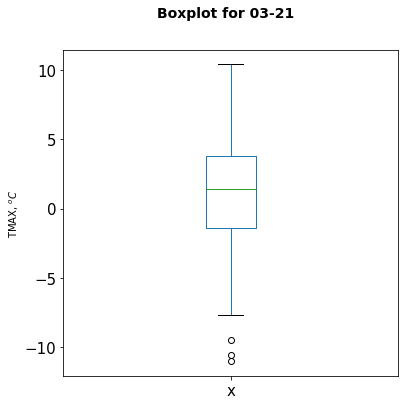

'03-21'

In [19]:
draw_box_plot(t['03-21'], 'TMAX')
t['03-21'].name

In [8]:
def delete_outliers (df):
    q = df.quantile([0.25, 0.75])
    # Межквартильное растояние
    low = q[0.25] - 1.5 * (q[0.75] - q[0.25])
    high = q[0.75] + 1.5 * (q[0.75] - q[0.25])
    return df[df.between(low, high)]

a = t.apply(lambda x: delete_outliers(x))


In [9]:
t[['02-28', '02-29', '03-01']]

,02-28,02-29,03-01
1881,-11.7,NaN,-8.5
1882,NaN,NaN,NaN
1883,NaN,NaN,NaN
1884,-9.6,-6.5,-6.7
1885,3.1,NaN,0.5
1886,-6.1,NaN,-5.7
1887,3.8,NaN,4.4
1888,-9.4,-8.1,-2.7
1889,-5.0,NaN,-9.4
1890,-6.0,NaN,-6.5


In [10]:
t['02-29'] = (t['02-28'].values + t['03-01'].values)/2


In [11]:
# def get_df_with_day_and_month_for_all_year (df):
#     amount = 0
#     am = 0
#     for day in range(1, 32):
#         for month in range (1, 13):
#             if day < 10 and month < 10: 
# #                 print(day, month)
#                 am += 1
#                 pattern = r'\d{4}-'+f'0{month}-'+f'0{day}'
#                 tmp = df[df['DATE'].str.match(pattern)]
#                 if tmp.empty:
#                     amount += 1
#                     print(pattern)
#                     print(day, month)
#                     print(tmp)
# #                 pd.DataFrame(tmp).to_csv(f'Preprocessing/0{month}-0{day}.csv')
#             if day < 10 and month > 9: 
# #                 print(day, month)
#                 am += 1
#                 pattern = r'\d{4}-'+f'{month}-'+f'0{day}'
#                 tmp = df[df['DATE'].str.match(pattern)]
#                 if tmp.empty:
# #                     print(pattern)
# #                     amount += 1
# #                     print(day, month)
# #                     print(tmp)
# #                 pd.DataFrame(tmp).to_csv(f'Preprocessing/{month}-0{day}.csv')
#             if day > 9 and month < 10:
# #                 print(day, month)
#                 am += 1
#                 pattern = r'\d{4}-'+f'0{month}-'+f'{day}'
#                 print(pattern)
#                 tmp = df[df['DATE'].str.match(pattern)]
#                 if tmp.empty:
#                     amount += 1
#                     print(day, month)
#                     print(tmp)
# #                 pd.DataFrame(tmp).to_csv(f'Preprocessing/0{month}-{day}.csv')
#             if day > 9 and month > 9:
# #                 print(day, month)
#                 am += 1
#                 pattern = r'\d{4}-'+f'{month}-'+f'{day}'
#                 tmp = df[df['DATE'].str.match(pattern)]
#                 if tmp.empty:
#                     amount += 1
#                     print(pattern)
#                     print(day, month)
#                     print(tmp)
#     print(amount)
#     print(am)
# #                 pd.DataFrame(tmp).to_csv(f'Preprocessing/0{month}-{day}.csv')
# #                 print(tmp)
# # спарсить к дате, чтобы дни и месяцы были нормальные

In [12]:
# df1 = df.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES',
#               'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES']).set_index('DATE') 

# TEMP_MIN['DATE'] = TEMP_MIN['DATE'].apply(pd.to_datetime, errors='ignore') 
# TEMP_MAX['DATE'] = TEMP_MIN['DATE'].apply(pd.to_datetime, errors='ignore') 
# TEMP_MIN.apply(pd.to_datetime(TEMP_MIN['DATE']), errors='ignore') 
# pd.to_datetime(TEMP_MAX['DATE'])
# print(TEMP_MAX.head())
# TEMP_MAX.info()
# print(TEMP_MAX.head())
# TEMP_MAX.info()
# print(TEMP_MAX.head())
# TEMP_MAX.info()
# # print('______________________')
# TEMP_MIN.info()
# for i in range(len(TEMP_MAX['DATE'])):
#     if TEMP_MAX['DATE'][i].day == 1 and TEMP_MAX['DATE'][i].month == 1:
#         first_january = 

# plt.plot(TEMP_MAX['DATE'], TEMP_MAX['TMAX'])
# month = 1
# day = 1
# d = datetime.strptime(f'{month}-{day}', '%m-%d')
# print(str(d.day))
# print(TEMP_MAX['DATE'][0])
# # print('1970-01-01'==d)
# print(re.match(d, TEMP_MAX['DATE'][0]))

# for i in TEMP_MAX['DATE']:
#     if re.match(r'\d{4}-01-01', i):
#          print()
# d = r'\d{4}-01-01'
# TEMP_MAX[TEMP_MAX['DATE'].str.match(d)]   

# TEMP_MIN[TEMP_MIN['DATE'].str.match(d)]
# days = range(1,31)
# print(days)
# a=3
# v=5
# d=1990
# # print(f'1990-0{a}-{v}')


In [13]:

# tmp = pd.read_csv('Preprocessing/03-21.csv', delimiter=',', usecols = ['DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN'])

# # tmp['DATE'] = tmp['DATE'].apply(pd.to_datetime, errors='ignore')
# tmp = tmp.dropna()
# tmp.describe()
# tmp.info()




In [14]:
draw_box_plot(tmp, 'TMAX')

NameError: name 'tmp' is not defined

In [ ]:
draw_box_plot(tmp, 'TMIN')

In [ ]:
draw_box_plot(tmp, 'TAVG')

In [ ]:
draw_box_plot(tmp, 'PRCP')

In [ ]:
tmp = delete_outliers(tmp, 'TMAX')
tmp = delete_outliers(tmp, 'TMIN')
tmp = delete_outliers(tmp, 'TAVG')

In [ ]:
plt.plot(tmp['DATE'], tmp['TMAX'])

In [ ]:
# tmp = tmp.set_index('DATE')

In [ ]:
# Разбивка набора данных на тренировочное и тестовое подмножества

from sklearn.model_selection import train_test_split

X, y = tmp.iloc[:, 0:4].values, tmp.iloc[:, 4].values
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test = X_train_[:, 1:4], X_test_[:, 1:4]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
X_train_n = ms.fit_transform(X_train)
X_test_n = ms.transform(X_test)

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#Fitting the Classifier
from sklearn.svm import SVR
classifier = SVR(C=1.0, cache_size=100, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
classifier_std = SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

classifier.fit(X_train_n, y_train)
classifier_std.fit(X_train_std, y_train)

prediction = classifier.predict(X_test_n)
prediction1 = classifier_std.predict(X_test_std)

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction2 = regressor.predict(X_test)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(5,), max_iter=5000, 
                   activation='identity', solver='adam', alpha=0.001,
                           random_state=1, learning_rate_init=0.01)
mlp.fit(X_train_n, y_train)
prediction_mlp = mlp.predict(X_test_n)

print("SVM")
print('The Explained Variance: %.2f' % classifier_std.score(X_test_std, y_test))
print('The Mean Absolute Error: %.2f degrees celcius' % mean_absolute_error(
    y_test, prediction1))
print('The Median Absolute Error: %.2f degrees celcius' %
      median_absolute_error(y_test, prediction1))

print('\nLinear regression')
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction2))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction2))  

print('\nMLP')
print("The Explained Variance: %.2f" % mlp.score(X_test_n, y_test))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction_mlp))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction_mlp))  



In [ ]:
cols = ['DATE', 'TMIN']
df_real = pd.DataFrame({'DATE': X_test_[:, 0], 'TMIN': y_test, 'TMIN_pred _SVM': prediction1, 'TMIN_pred _Lin_Regr': prediction2, 'TMIN_pred _MLP': prediction_mlp})
df_pred = pd.DataFrame({'DATE': X_test_[:, 0], 'TMIN': prediction1})
# df_real = df_real['DATE'].apply(pd.to_datetime, errors='ignore')
df_real.set_index('DATE')

# plt.figure(figsize=(10,10))
df_real.plot(x = 'DATE', color = ["dodgerblue", 'r', 'darkmagenta', 'g'], style = ['', '--', '-', '-.'],linewidth=1, figsize=(15,15), )
# df_real = df_real.groupby('DATE')['TMIN'].mean()
# df_pred = df_pred.groupby('DATE')['TMIN'].mean()
# p1 = df_real.plot(color = "dodgerblue", linewidth=2, label = "Real")
# p2 = df_pred.plot(linestyle='--', color = 'r', linewidth=2, label = "Prediction")
# plt.legend(handles=[p1, p2])
plt.grid(True)
plt.xticks(rotation=75)
plt.xlabel('Date')    
plt.ylabel('Min temperature, $^o, C$')    
plt.title('Предсказание минимальной температуры', fontsize=14, fontweight='bold')
plt.show()


# fig, ax = plt.subplots()
# ax.plot_date(df_real['DATE'], df_real['TMIN'], linestyle='--')
# plt.plot(df_real['DATE'], df_real['TMIN'], color='b')
# plt.plot(X_test_[:, 0], prediction1, color='r')

In [ ]:
# Разбивка набора данных на тренировочное и тестовое подмножества
# tmp1 = tmp['DATE', 'TMIN', 'TMAX']
# from sklearn.model_selection import train_test_split
# print(tmp)

# X, y = tmp.iloc[0:-1, 4].values, tmp.iloc[-1, 4]
# # X_train, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# # X_train, X_test = X_train_[:, 1], X_test_[:, 2]
# y

In [ ]:
# from sklearn.linear_model import LinearRegression  
# regressor = LinearRegression()
# t = np.array(X.T).reshape((-1, 1))
# # t_train = np.array(X_test).reshape((-1, 1))
# regressor.fit(t, y_train)
# # prediction = regressor.predict(t_train)

# from sklearn.metrics import mean_absolute_error, median_absolute_error  
# # print("The Explained Variance: %.2f" % regressor.score(t_train, y_test))  
# print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))  
# print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))  



In [ ]:
now = (datetime.now() - timedelta(60)).strftime('%y-%m-%d')

data = delete_outliers(pd.read_csv('Preprocessing/03-21.csv', delimiter=',', index_col='DATE'), '03-21')
data1 = delete_outliers(pd.read_csv('Preprocessing/03-22.csv', delimiter=',', index_col='DATE'), '03-22')
data2 = delete_outliers(pd.read_csv('Preprocessing/03-23.csv', delimiter=',', index_col='DATE'), '03-23')
data3 = delete_outliers(pd.read_csv('Preprocessing/03-24.csv', delimiter=',', index_col='DATE'), '03-24')
data4 = delete_outliers(pd.read_csv('Preprocessing/03-25.csv', delimiter=',', index_col='DATE'), '03-25')
data5 = delete_outliers(pd.read_csv('Preprocessing/03-26.csv', delimiter=',', index_col='DATE'), '03-26')
data6 = delete_outliers(pd.read_csv('Preprocessing/03-27.csv', delimiter=',', index_col='DATE'), '03-27')
data7 = delete_outliers(pd.read_csv('Preprocessing/03-28.csv', delimiter=',', index_col='DATE'), '03-28')
data8 = delete_outliers(pd.read_csv('Preprocessing/03-29.csv', delimiter=',', index_col='DATE'), '03-29')
data9 = delete_outliers(pd.read_csv('Preprocessing/03-30.csv', delimiter=',', index_col='DATE'), '03-30')

data10 = pd.read_csv('Preprocessing/04-01.csv', delimiter=',', index_col='DATE')

def rename_cols_rows(data):
    data['DATE'] = data['DATE'].apply(pd.to_datetime, errors='ignore')
    year = data['DATE'].map(lambda x: x.year)
    day_month = data['DATE'].map(lambda x:x.strftime('%m-%d')).unique()[0]
    return data.drop('DATE', 1).set_index(year).rename(columns={'TMAX': f'{day_month}'})

df = pd.concat([data, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 1, join='outer', sort=True)
df = df.dropna()
df = df.T
print(df)
# df2 = data.merge(data1, on='DATE', how='outer', left_index=True, right_index=True)
# print(df)

In [20]:

t1 = t.apply(lambda x: delete_outliers(x))
t1 = t1.dropna()
# t1.info



In [12]:
X, y = t1.iloc[:, :-1].values, t1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# X_train, X_test = X_train_[:, 1], X_test_[:, 2]
X_train, X_test, y_train, y_test = np.array(X[:-4]), np.array(X[-4:]), np.array(y[:-4]), np.array(y[-4:])
# print(X_test.shape)/

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction1 = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score


print("The Explained Variance: %.2f" % regressor.score(X_train, y_train))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction1))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction1))

The Explained Variance: 1.00
The Mean Absolute Error: 4.56 degrees celsius
The Median Absolute Error: 4.00 degrees celsius


In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

from sklearn.svm import SVR
#Fitting the Classifier
SVR = SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

SVR.fit(X_train_std, y_train)

prediction = SVR.predict(X_test_std)
print("SVM")
print('The Explained Variance: %.2f' % SVR.score(X_train_std, y_train))
print('The Mean Absolute Error: %.2f degrees celcius' % mean_absolute_error(
    y_test, prediction))
print('The Median Absolute Error: %.2f degrees celcius' %
      median_absolute_error(y_test, prediction))

# Specifies the kernel type to be used in the algorithm. 
# It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
# If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

SVM
The Explained Variance: 0.97
The Mean Absolute Error: 4.39 degrees celcius
The Median Absolute Error: 4.04 degrees celcius


In [15]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler(feature_range=(0,1))
X_train_n = ms.fit_transform(X_train)
X_test_n = ms.transform(X_test)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(3,), max_iter=5000, 
                   activation='logistic', solver='adam', alpha=0.001,
                           random_state=1, learning_rate_init=0.01)
mlp.fit(X_train_n, y_train)
prediction_mlp = mlp.predict(X_test_n)

print('\nMLP')
print("The Explained Variance: %.2f" % mlp.score(X_train_n, y_train))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction_mlp))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction_mlp))


MLP
The Explained Variance: -0.00
The Mean Absolute Error: 5.03 degrees celsius
The Median Absolute Error: 4.86 degrees celsius


In [16]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train_n, y_train)
prediction_DT = clf.predict(X_test_n)

print('\nDecision Tree')
print("The Explained Variance: %.2f" % mlp.score(X_train_n, y_train))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction_DT))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction_DT))


Decision Tree
The Explained Variance: -0.00
The Mean Absolute Error: 3.45 degrees celsius
The Median Absolute Error: 3.40 degrees celsius


In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear', n_estimators=100, random_state=0)
regr.fit(X_train_std, y_train)  

prediction_Ada_Boost = regr.predict(X_test_std)

print('\nDecision Tree')
print("The Explained Variance: %.2f" % regr.score(X_train_std, y_train))  
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction_Ada_Boost))  
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction_Ada_Boost))


IndentationError: unexpected indent (<ipython-input-31-1b5864e2f621>, line 3)

In [ ]:
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
# Activation function for the hidden layer.
# ‘square’, ‘exponential’
# ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
# ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
# ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
# The solver for weight optimization.

# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
# ‘sgd’ refers to stochastic gradient descent.
# ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [ ]:
df = pd.DataFrame({'TEMP': y_test, 'TEMP_LR': prediction1, 'TEMP_SCR': prediction, 'TEMP_MLP': prediction_mlp, 'TEMP_DT': prediction_DT, 'TEMP_Ada_Boost': prediction_mlp})

df.plot(y = ['TEMP', 'TEMP_SCR', 'TEMP_MLP', 'TEMP_Ada_Boost'],color = ["dodgerblue", 'r', 'y', 'g', 'darkmagenta', 'pink'], style = ['', '--', '-', '-.', ''],linewidth=1, figsize=(25,10), )
plt.grid(True)
plt.xticks(rotation=75)
plt.xlabel('Date')    
plt.ylabel('Max temperature, $^o, C$')    
plt.title('Предсказание  максимальной температуры', fontsize=14, fontweight='bold')
plt.show()
